# Jupyter Logo

As you may know we have an Jupyter logo, as an SVG. 
But as for the [Kilogram](http://en.wikipedia.org/wiki/Kilogram) that as a prototype kilogram that act a reference, we suffer from the fact that the logo does not have an abstract description that could explain how to construct it, which is bad. 

So with a little bit of reverse engeniering and Inkscape I was able to extract some geometric primitive to build the jupyter logo. 

Still work that need to be done, especailly for the gradient to get the endpoint and the colors.

But this allow to do some nice things like plotting the logo in matplotlib :-)

In [1]:
%matplotlib inline

In [2]:
import numpy

In [3]:
from matplotlib.patches import Circle, Wedge
import matplotlib.pyplot as plt

In [13]:
def Jupyter(w=5, blueprint=False, ax=None, moons=True, steps=None, color='orange'):
    ## x,y center and diameter of primitive circles, 
    ## than to Inkspace.
    xyrs = numpy.array((
            (315, 487, 406),
            (315, 661, 630),
            (315, 315, 630), 
            (178, 262, 32),
            (146, 668, 20),
            (453, 705, 27),
    ))

    center = (315,487)
    xyrs[:,0] -= center[0]
    xyrs[:,1] -= center[1]
    if not ax:
        fig,axes = plt.subplots()
        fig.set_figheight(w)
        fig.set_figwidth(w)
    else:
        axes = ax
    axes.set_axis_bgcolor('white')
    axes.set_aspect('equal')
    axes.set_xlim(-256,256)
    axes.set_ylim(-256,256)
    t=-1
    ec='white'
    if blueprint:
        ec = 'blue'
        
    for xyr in xyrs[:steps]:
        xy,r= xyr[:2],xyr[2]
        if r == 630:
            fill=True;
            c = 'white'
        else:
            fill=True
            c=color

        if r==630 :
            a = 40
            axes.add_artist(Wedge(xy,r/2,a+t*180, 180-a+t*180, fill=fill, color=c, width=145, ec=ec))
            t = t+1
        elif r==406 :
            axes.add_artist(Circle(xy,r/2, fill=fill, color=c, ec=ec))
        else:
            if r<100 and moons:
                axes.add_artist(Circle(xy,r/2, fill=fill, color='gray', ec=ec))
        if blueprint:
            axes.plot(xy[0],xy[1],'+b')
    axes.xaxis.set_tick_params(color='white')
    axes.yaxis.set_tick_params(color='white')
    axes.xaxis.set_ticklabels('')
    axes.yaxis.set_ticklabels('')

    return axes

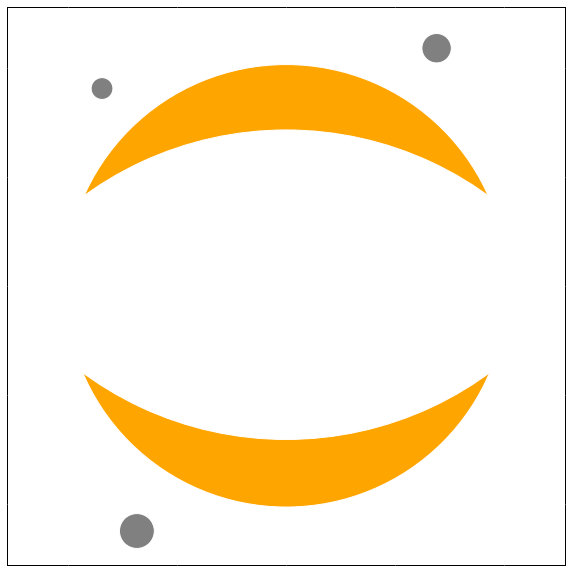

In [14]:
ax = Jupyter(10, blueprint=False)

And lets make the outline apparent: 

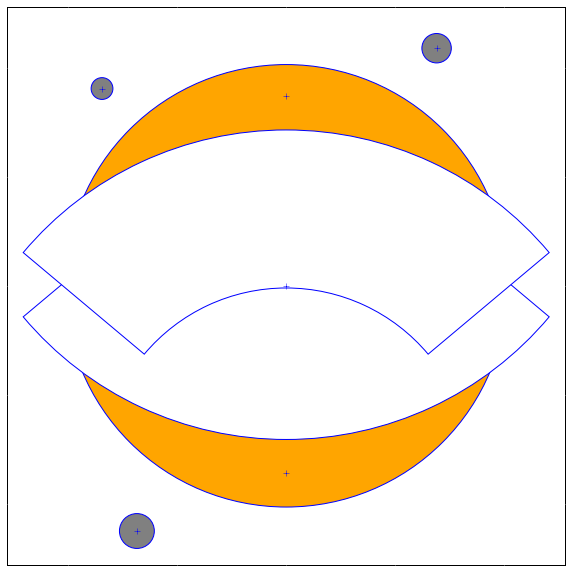

In [15]:
ax = Jupyter(10, blueprint=True)

Color and gradients are not right yet, but looks great !

for small graphs you can also remove moons. 

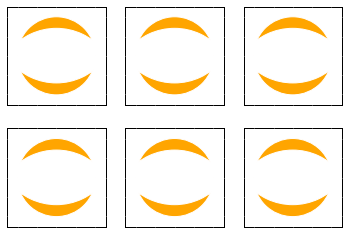

In [16]:
fig, axes = plt.subplots(2,3)
for ax in axes.flatten():
    Jupyter(ax=ax, moons=False)

If you run it locally, below you will have an interactive version that will show you the differents step of drawing the logo. 

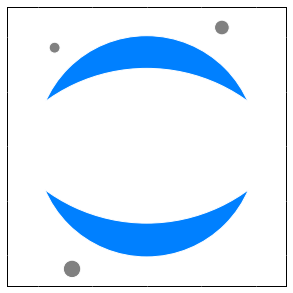

In [17]:
from IPython.html.widgets import interact

cc = (0,1,0.01)

@interact(n=(0,6),r=cc,g=cc, b=cc)
def fun(n=6, outline=False, r=1.0, g=0.5, b=0.0):
    return Jupyter(steps=n, blueprint=outline, color=(r,g,b))

As usual PR welcommed ! 

NB: I wrote this on my way back from [Strata](http://strataconf.com/big-data-conference-ca-2015), thanks to [Continuum Analytics](http://continuum.io/) for sponsoring my ticket, and for the nice conversations we had there ! 